# Timesfm Usage Example

## Loading Timesfm Model

In [1]:
import os 
import sys
import torch
import numpy as np

src_path = os.path.abspath(os.path.join("..", "src"))
if src_path not in sys.path:
    sys.path.insert(0, src_path)

from samay.model import TinyTimeMixerModel
from samay.dataset import TinyTimeMixerDataset
from samay.utils import load_args

arg_path = "../config/tinytimemixer.json"
args = load_args(arg_path)
ttm = TinyTimeMixerModel(**args)


## Define the datasets

In [2]:
train_dataset = TinyTimeMixerDataset(name="ett", datetime_col='date', path='../src/samay/models/moment/data/ETTh1.csv', 
                             mode='train', batch_size=64, context_len=512, horizon_len=96)
val_dataset = TinyTimeMixerDataset(name="ett", datetime_col='date', path='../src/samay/models/moment/data/ETTh1.csv',
                             mode='test', batch_size=64, context_len=512, horizon_len=96)


## Evaluate the zero-shot forecasting

In [3]:
metrics = ttm.evaluate(val_dataset)
print(metrics)

{'mse': 9.531482, 'mae': 1.6833216, 'mase': 0.7448195, 'mape': 1049.9802, 'rmse': 3.0873098, 'nrmse': 0.06723380847098956, 'smape': 0.4409384, 'msis': 0.05309491, 'nd': 0.4522242285302642}


## Visualization of the evaluation

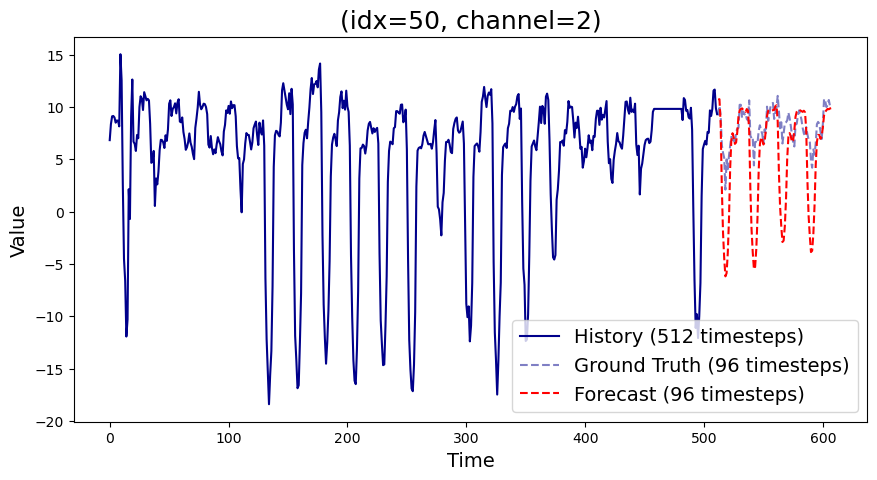

In [4]:
# import matplotlib.pyplot as plt

# # Pick a random channel and time index
# trues = np.array(trues)
# preds = np.array(preds)
# histories = np.array(histories)
# channel_idx = np.random.randint(0, trues.shape[1]) 
# time_index = np.random.randint(0, trues.shape[0]) 

# history = histories[time_index, channel_idx, :] 
# true = trues[time_index, channel_idx, :]
# pred = preds[time_index, channel_idx, :]

# plt.figure(figsize=(12, 4))

# # Plotting the first time series from history
# plt.plot(range(len(history)), history, label='History (128 timesteps)', c='darkblue')

# # Plotting ground truth and prediction
# num_forecasts = len(true)

# offset = len(history)
# plt.plot(range(offset, offset + len(true)), true, label='Ground Truth (64 timesteps)', color='darkblue', linestyle='--', alpha=0.5)
# plt.plot(range(offset, offset + len(pred)), pred, label='Forecast (64 timesteps)', color='red', linestyle='--')

# plt.title(f"ETTh1 (Hourly) -- (idx={time_index}, channel={channel_idx})", fontsize=18)
# plt.xlabel('Time', fontsize=14)
# plt.ylabel('Value', fontsize=14)
# plt.legend(fontsize=14)
# plt.show()
ttm.plot(val_dataset)

## Finetune Timesfm Model on the ETT dataset

In [5]:
finetuned_model = ttm.finetune(train_dataset)

Epoch 0, Loss: 5.712474749638484
Epoch 1, Loss: 5.526209097642165
Epoch 2, Loss: 5.450508851271409
Epoch 3, Loss: 5.389744758605957
Epoch 4, Loss: 5.340495439676138


## Test the Finetuned Model

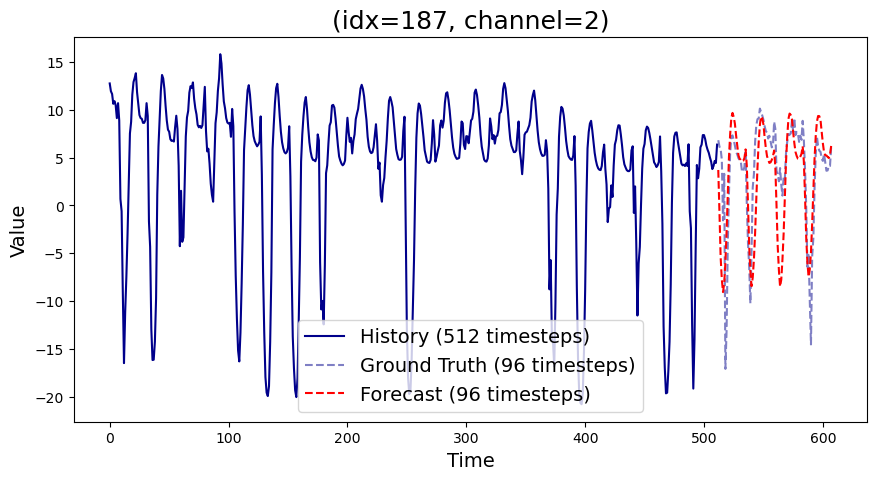

In [8]:
# avg_loss, trues, preds, histories = tfm.evaluate(val_dataset)
# print("Validation loss:", avg_loss)
ttm.plot(val_dataset)

## Visualization of the evaluation

In [7]:
# import matplotlib.pyplot as plt

# # Pick a random channel and time index
# trues = np.array(trues)
# preds = np.array(preds)
# histories = np.array(histories)
# channel_idx = np.random.randint(0, trues.shape[1]) 
# time_index = np.random.randint(0, trues.shape[0]) 

# history = histories[time_index, channel_idx, :] 
# true = trues[time_index, channel_idx, :]
# pred = preds[time_index, channel_idx, :]

# plt.figure(figsize=(12, 4))

# # Plotting the first time series from history
# plt.plot(range(len(history)), history, label='History (512 timesteps)', c='darkblue')

# # Plotting ground truth and prediction
# num_forecasts = len(true)

# offset = len(history)
# plt.plot(range(offset, offset + len(true)), true, label='Ground Truth (192 timesteps)', color='darkblue', linestyle='--', alpha=0.5)
# plt.plot(range(offset, offset + len(pred)), pred, label='Forecast (192 timesteps)', color='red', linestyle='--')

# plt.title(f"ETTh1 (Hourly) -- (idx={time_index}, channel={channel_idx})", fontsize=18)
# plt.xlabel('Time', fontsize=14)
# plt.ylabel('Value', fontsize=14)
# plt.legend(fontsize=14)
# plt.show()